In [40]:
library('igraph')
library('Matrix')
library('pracma')

# Problem 1a

In [41]:
means <- numeric(5)
vars <- numeric(5)
p = c(0.003, 0.004, 0.01, 0.05, 0.1)
N = 1000
g1 <- erdos.renyi.game(N,p[1],directed=F)
g2 <- erdos.renyi.game(N,p[2],directed=F)
g3 <- erdos.renyi.game(N,p[3],directed=F)
g4 <- erdos.renyi.game(N,p[4],directed=F)
g5 <- erdos.renyi.game(N,p[5],directed=F)
means <- c(mean(degree(g1)), mean(degree(g2)), mean(degree(g3)), mean(degree(g4)), mean(degree(g5)))
vars <- c(var(degree(g1)), var(degree(g2)), var(degree(g3)), var(degree(g4)), var(degree(g5)))

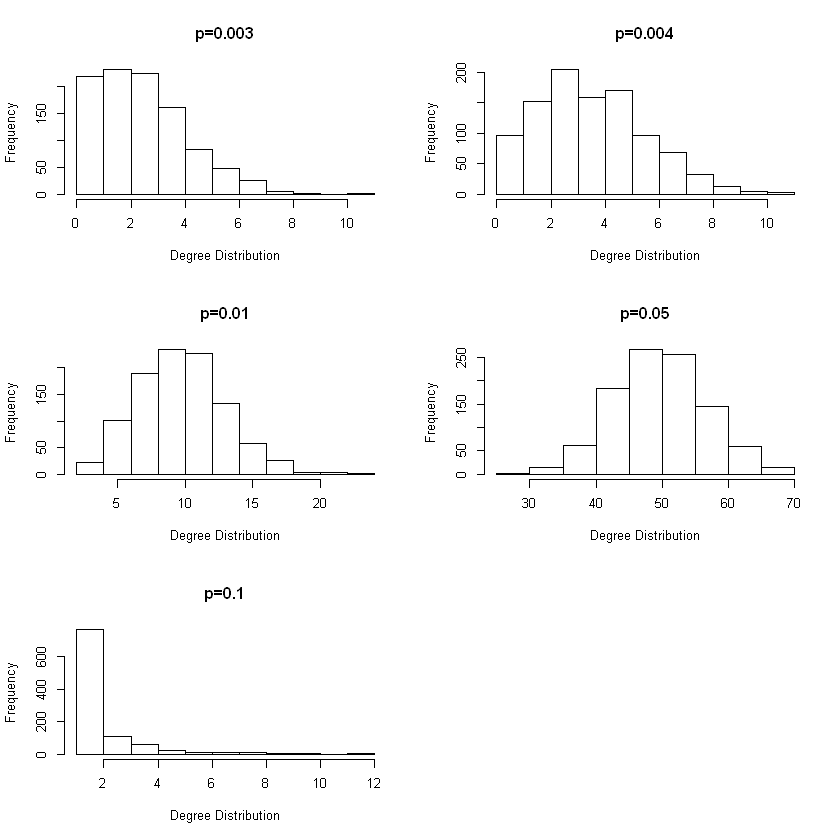

In [70]:
par(mfrow=c(3,2))
hist(degree(g1),xlab='Degree Distribution',main='p=0.003')
hist(degree(g2),xlab='Degree Distribution',main='p=0.004')
hist(degree(g3),xlab='Degree Distribution',main='p=0.01')
hist(degree(g4),xlab='Degree Distribution',main='p=0.05')
hist(degree(g5),xlab='Degree Distribution',main='p=0.1')

In [43]:
exp_means=N*p
exp_vars=N*p*(1-p)
data.frame(p=p,mean=means,expected.mean=exp_means,variance=vars,expected.variance=exp_vars)

p,mean,expected.mean,variance,expected.variance
0.003,2.990,3,3.119019,2.991
0.004,4.104,4,3.929113,3.984
0.010,10.212,10,10.347403,9.900
0.050,50.248,50,47.854350,47.500
0.100,100.140,100,94.356757,90.000


The degree distribution observed is Binomial, as each node's degree is determined by repeated Bernoulli trials with probability p.  The plots of the degree distribution tends towards a normal distribution, as expected by the Central Limit Theorem for a large graph.  The expected means are Np and the expected variances Np(1-p).  The experimental means and variances are very close to the expected values.

# Problem 1b

In [71]:
nTrials <- 1000
connPer <- numeric(5)
for (i in 1:nTrials){
g1 <- erdos.renyi.game(N,p[1],directed=F)
g2 <- erdos.renyi.game(N,p[2],directed=F)
g3 <- erdos.renyi.game(N,p[3],directed=F)
g4 <- erdos.renyi.game(N,p[4],directed=F)
g5 <- erdos.renyi.game(N,p[5],directed=F)

connPer <- connPer + c(is.connected(g1), is.connected(g2), is.connected(g3), is.connected(g4), is.connected(g5))
}
connPer <- connPer/nTrials

In [72]:
g1.components <- clusters(g1)
ix <- which.max(g1.components$csize)
g1.giant <- induced.subgraph(g1, which(g1.components$membership == ix))
g2.components <- clusters(g2)
ix <- which.max(g2.components$csize)
g2.giant <- induced.subgraph(g2, which(g2.components$membership == ix))
g3.components <- clusters(g3)
ix <- which.max(g3.components$csize)
g3.giant <- induced.subgraph(g3, which(g3.components$membership == ix))
g4.components <- clusters(g4)
ix <- which.max(g4.components$csize)
g4.giant <- induced.subgraph(g4, which(g4.components$membership == ix))
g5.components <- clusters(g5)
ix <- which.max(g5.components$csize)
g5.giant <- induced.subgraph(g5, which(g5.components$membership == ix))
diameter <- c(diameter(g1.giant),diameter(g2.giant),diameter(g3.giant),diameter(g4.giant),diameter(g5.giant))
gccSize <- c(max(g1.components$csize),max(g2.components$csize),max(g3.components$csize),max(g4.components$csize),max(g5.components$csize))

In [73]:
data.frame(p=p,percentage.connected=connPer,gcc.size=gccSize,gcc.diameter=diameter)

p,percentage.connected,gcc.size,gcc.diameter
0.003,0.000,950,15
0.004,0.000,981,11
0.010,0.966,1000,6
0.050,1.000,1000,3
0.100,1.000,1000,3


For the tried $p$ values, we see the connectedness of the graphs increase with $p$.  The likelihood of producing a connected graph, along with the average GCC size increases with $p$, to a point where all simulations presented connected graphs for $p=0.05$ and $p=0.1$.
The diameter of the GCC decreases with $p$.  As the likelihood of an edge existing increases, there are more paths between any 2 given nodes, meaning that the diameter of the graph will decrease.

# Problem 1c

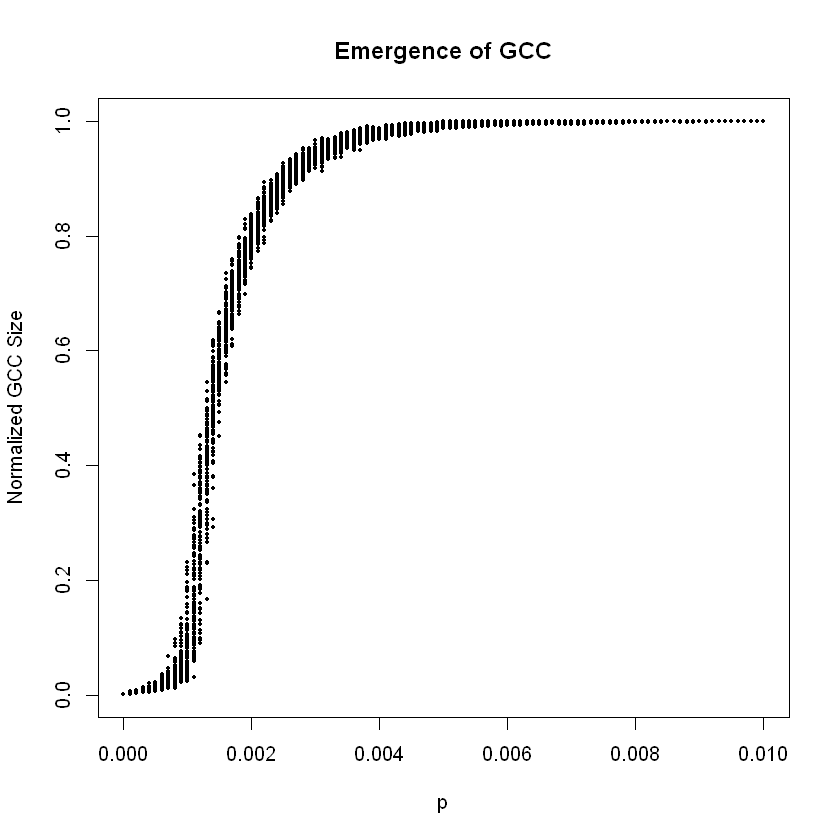

In [77]:
N=1000
nTrials=100
p1=rep(seq(0,0.01,0.0001),nTrials)
gccSizes=double(length(p1))
for (j in 1:length(p1)){
    q=p1[j]
    g <- erdos.renyi.game(N,q,directed=F)
    g.components <- clusters(g)
    gccSizes[j] <- max(g.components$csize)/N
}
plot(p1,gccSizes,cex=0.4,pch=16,xlab='p',ylab='Normalized GCC Size',main='Emergence of GCC')

The produced plot confirms the theoretical values derived in lecture.  Emergence of a GCC is defined as when the average size of the GCC begins to increase rapidly.  This critical point is found theoretically to be when the average node degree is at $$n*p=1$$where $n$ is the number of nodes and $p$ is the probability of edge existence.  In this example, with $n=1000$, we should expect emergence of a GCC at $p=0.001$, which is what we see in the plot above.

# Problem 1d

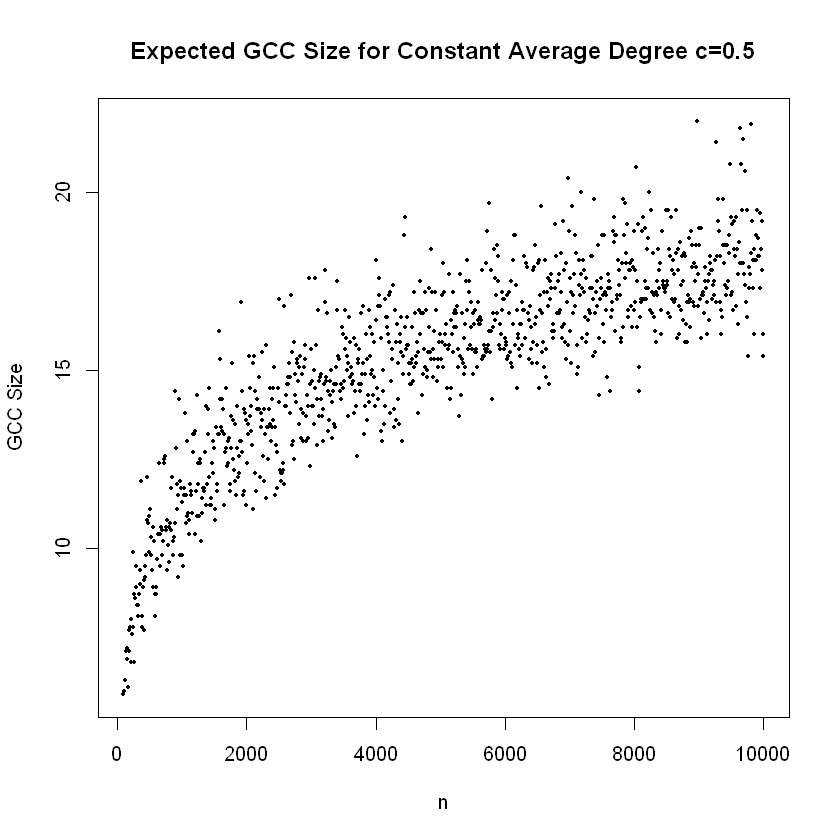

In [78]:
n=seq(100,10000,10)
c=0.5
p2=c/n
nTrials=10
gccSize=numeric(length(p2))
for (j in 1:length(p2)){
    q=p2[j]
    w=n[j]
    sum = 0
    for (i in 1:nTrials){
        g <- erdos.renyi.game(w,q,directed=F)
        g.components <- clusters(g)
        sum = sum + max(g.components$csize)
    }
    gccSize[j]=sum/nTrials
}
plot(n,gccSize,cex=0.4,pch=16,ylab='GCC Size',main='Expected GCC Size for Constant Average Degree c=0.5')

For $c=np=0.5$, the expected GCC Size appears to be proportional to $\sqrt(n)$.

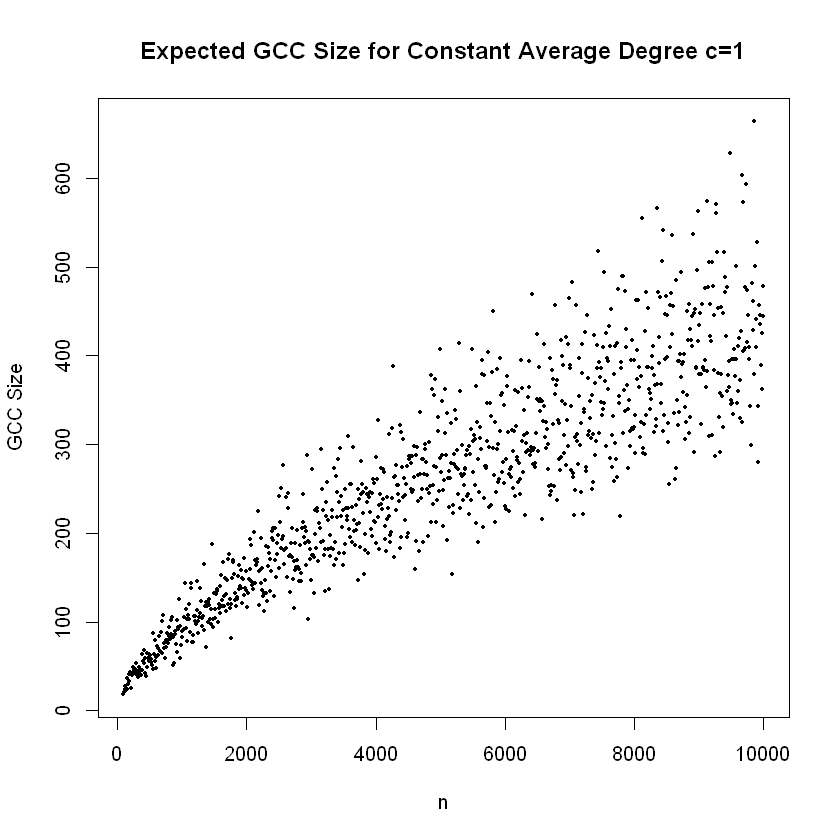

In [81]:
c=1
p2=c/n
nTrials=10
gccSize=numeric(length(p2))
for (j in 1:length(p2)){
    q=p2[j]
    w=n[j]
    sum = 0
    for (i in 1:nTrials){
        g <- erdos.renyi.game(w,q,directed=F)
        g.components <- clusters(g)
        sum = sum + max(g.components$csize)
    }
    gccSize[j]=sum/nTrials
}
plot(n,gccSize,cex=0.4,pch=16,ylab='GCC Size',main='Expected GCC Size for Constant Average Degree c=1')

For $c=np=1$, the expected GCC size is linear in $n$.  As $n$ increases, there is more variance in the GCC size, as $p$ is now very small.

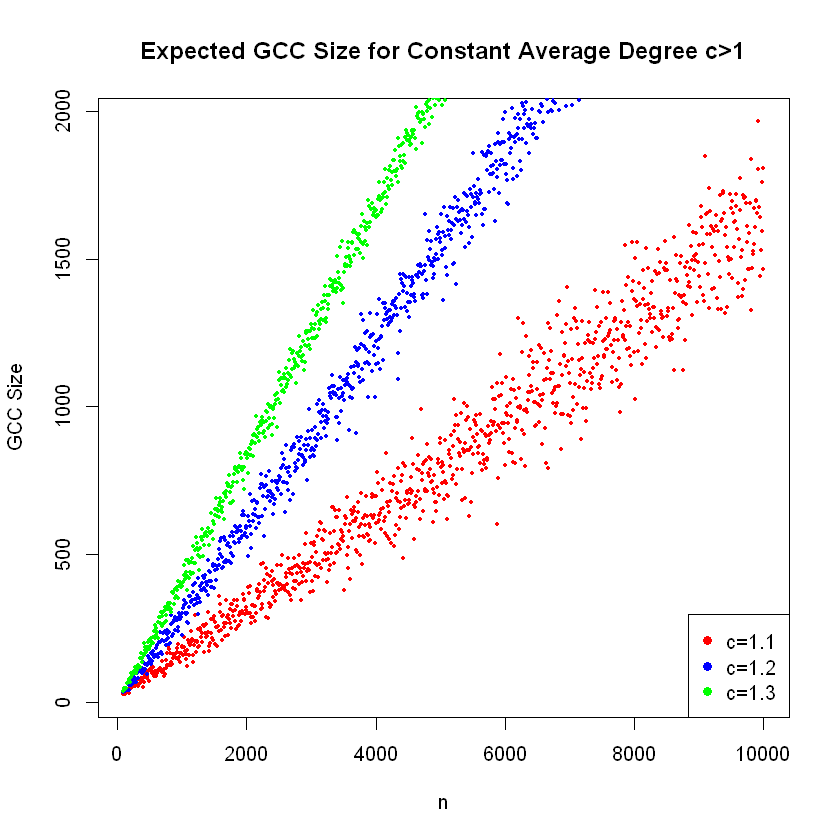

In [96]:
c=1.1
p2=c/n
nTrials=10
gccSize1=numeric(length(p2))
for (j in 1:length(p2)){
    q=p2[j]
    w=n[j]
    sum = 0
    for (i in 1:nTrials){
        g <- erdos.renyi.game(w,q,directed=F)
        g.components <- clusters(g)
        sum = sum + max(g.components$csize)
    }
    gccSize1[j]=sum/nTrials
}
c=1.2
p2=c/n
gccSize2=numeric(length(p2))
for (j in 1:length(p2)){
    q=p2[j]
    w=n[j]
    sum = 0
    for (i in 1:nTrials){
        g <- erdos.renyi.game(w,q,directed=F)
        g.components <- clusters(g)
        sum = sum + max(g.components$csize)
    }
    gccSize2[j]=sum/nTrials
}
c=1.3
p2=c/n
gccSize3=numeric(length(p2))
for (j in 1:length(p2)){
    q=p2[j]
    w=n[j]
    sum = 0
    for (i in 1:nTrials){
        g <- erdos.renyi.game(w,q,directed=F)
        g.components <- clusters(g)
        sum = sum + max(g.components$csize)
    }
    gccSize3[j]=sum/nTrials
}
plot(n,gccSize1,col='red',cex=0.4,pch=16,ylab='GCC Size',main='Expected GCC Size for Constant Average Degree c>1')
points(n,gccSize2,col='blue',cex=0.4,pch=16)
points(n,gccSize3,col='green',cex=0.4,pch=16)
legend("bottomright", legend=c("c=1.1", "c=1.2", "c=1.3"),col=c('red','blue','green'),pch=16, cex=1)

For values of $c=np>1$, we see GCC sizes that are again linear in $n$.  As $c$ increase, the variance decreases.

# Problem 2a

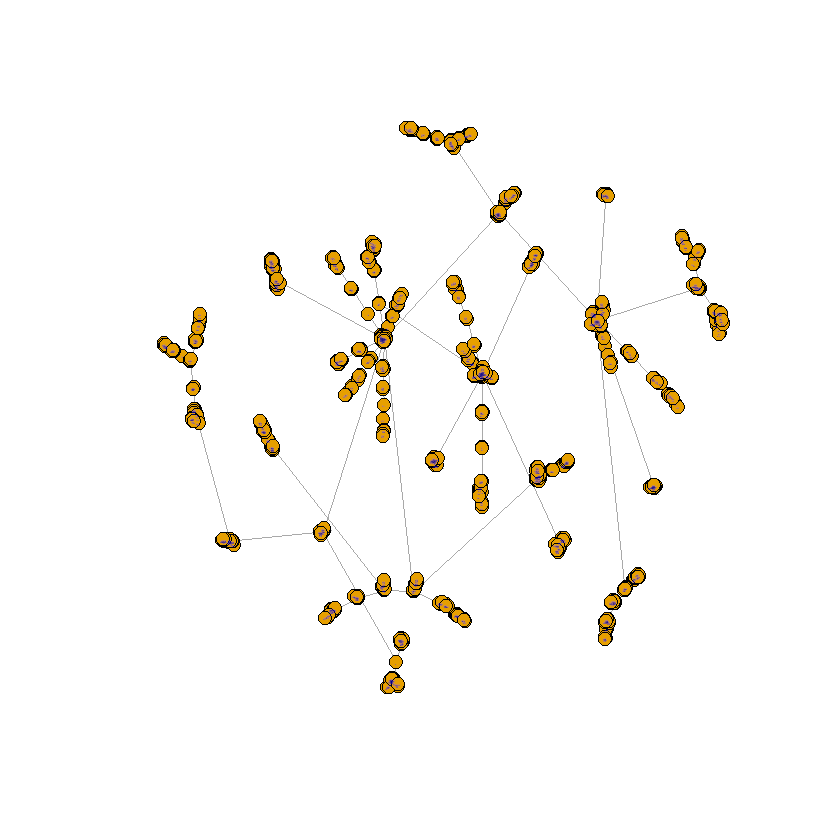

In [102]:
n=1000
g1 <- barabasi.game(n, directed=F)
plot(g1,vertex.size=5,vertex.label.cex=0.1)

Any preferential attachment model is always connected, by design.  Each new node that joins the network is immediately connected to the existing network by $m$ edges.  This is an iterative process, so the entire graph consists of only one component.

Preferential attachment networks are distinguishable by "hubs" throughout that have degree much higher than most other nodes.  These hubs are the older nodes that gained higher degree earlier.  As edges are added preferentially, these hubs keep picking up more edges.

# Problem 2b

In [103]:
fg <- fastgreedy.community(g)
modularity=max(fg$mod)
modularity

[1] 0.9648435

# Problem 2c

In [110]:
n=10000
g2 <- barabasi.game(n, directed=F)
fg <- fastgreedy.community(g2)
modularity <- max(fg$mod)
modularity

[1] 0.9785484

The modularity of the $n=10000$ network is higher than that of the $n=1000$ network. 

# Problem 2d

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"17 y values <= 0 omitted from logarithmic plot"

[1] -3.003602

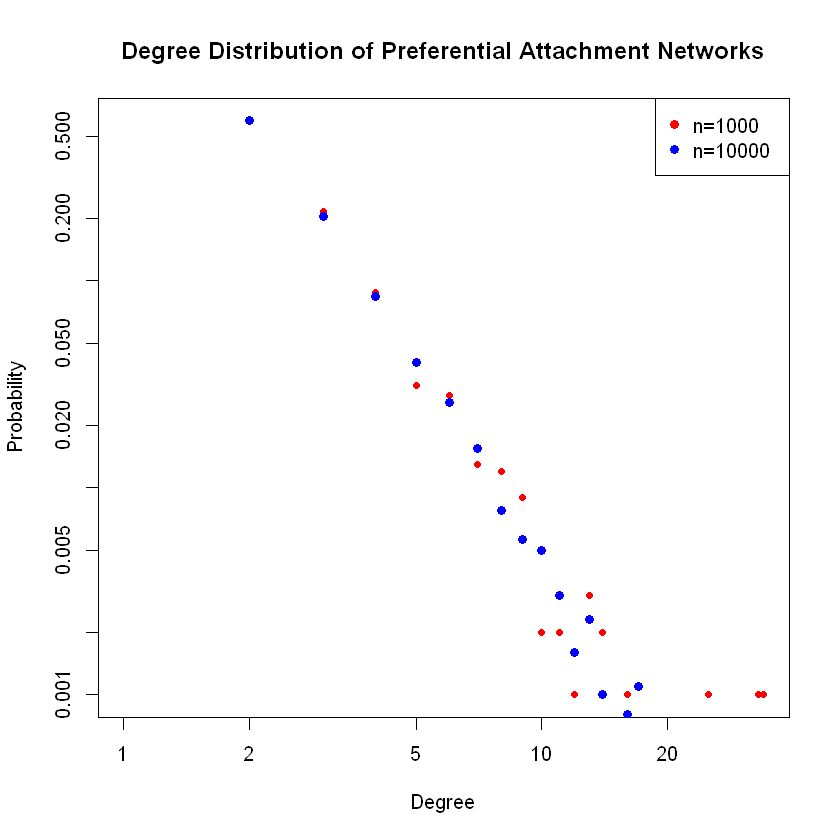

In [148]:
plot(degree.distribution(g1),log="xy",xlab='Degree',ylab='Probability',main='Degree Distribution of Preferential Attachment Networks',cex=0.8,pch=16,col='red')
points(degree.distribution(g2),cex=1,pch=16,col='blue')
legend("topright", legend=c("n=1000", "n=10000"),col=c('red','blue'),pch=16, cex=1)
slope<-(log(degree.distribution(g2)[10])-log(degree.distribution(g2)[5]))/(log(10)-log(5))

In [180]:
-slope

[1] 3.003602

The slope of the distribution is found above and is roughly $\gamma=3$.  This is the expected value for a preferential attachment graph.  This is the power law exponent.

# Problem 2e

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"28 y values <= 0 omitted from logarithmic plot"

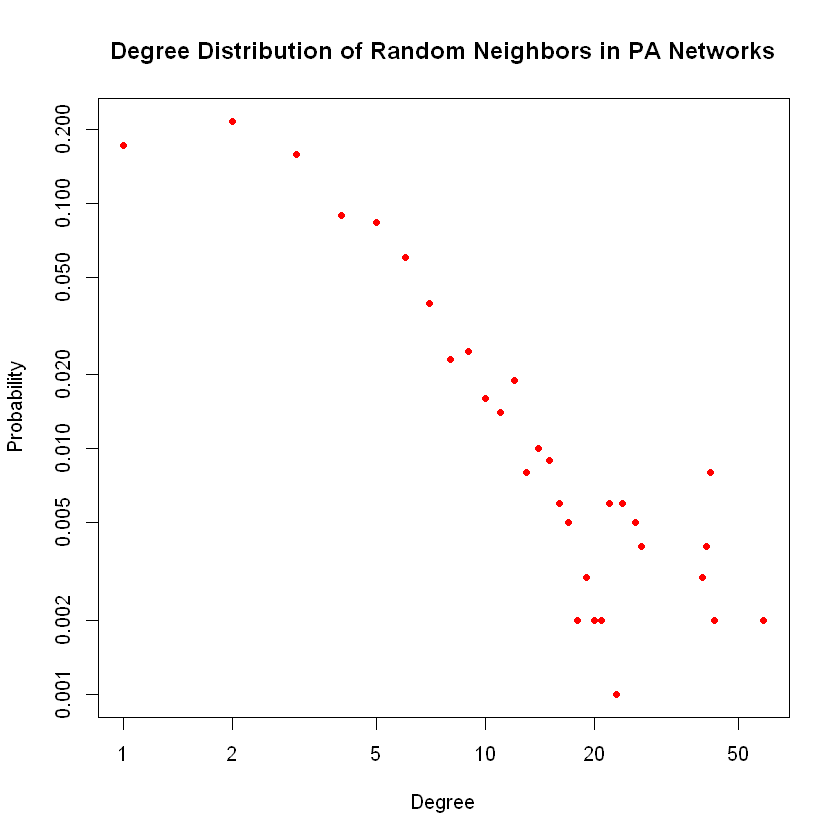

In [178]:
nSamples = 1000;
degs=numeric(nSamples)
for (l in 1:nSamples){
    i=sample(1:10000,1)
    v=neighbors(g2,i)
    if (length(v)==1){
        j=v;
    }else{
        j=sample(v,1)
    }
    degs[l]=degree(g2,j)
}
degdist=numeric(max(degs))
for (i in 1:length(degs)){
    degdist[degs[i]] <- degdist[degs[i]] + 1
}
degdist = degdist/length(degs)
plot(degdist,log="xy",xlab='Degree',ylab='Probability',main='Degree Distribution of Random Neighbors in PA Networks',cex=0.8,pch=16,col='red')
slope2<-mean((log(degdist[10])-log(degdist[5]))/(log(10)-log(5)),(log(degdist[10])-log(degdist[6]))/(log(10)-log(6)),(log(degdist[10])-log(degdist[7]))/(log(10)-log(7)),(log(degdist[10])-log(degdist[8]))/(log(10)-log(8)),(log(degdist[10])-log(degdist[9]))/(log(10)-log(9)))

In [181]:
-slope2

[1] 2.375039

In examining the degree distribution of randomly selected neighbors of randomly selected nodes, we see a drop in the power law exponent below 3.  Trials averaged to have a new power law exponent around $\gamma=2.3$.  The above result gives the slope for this 

In [142]:
orderedDegs=numeric(1000)
for (l in 1:1000){
    orderedDegs[l]=degree(g1,l)
}

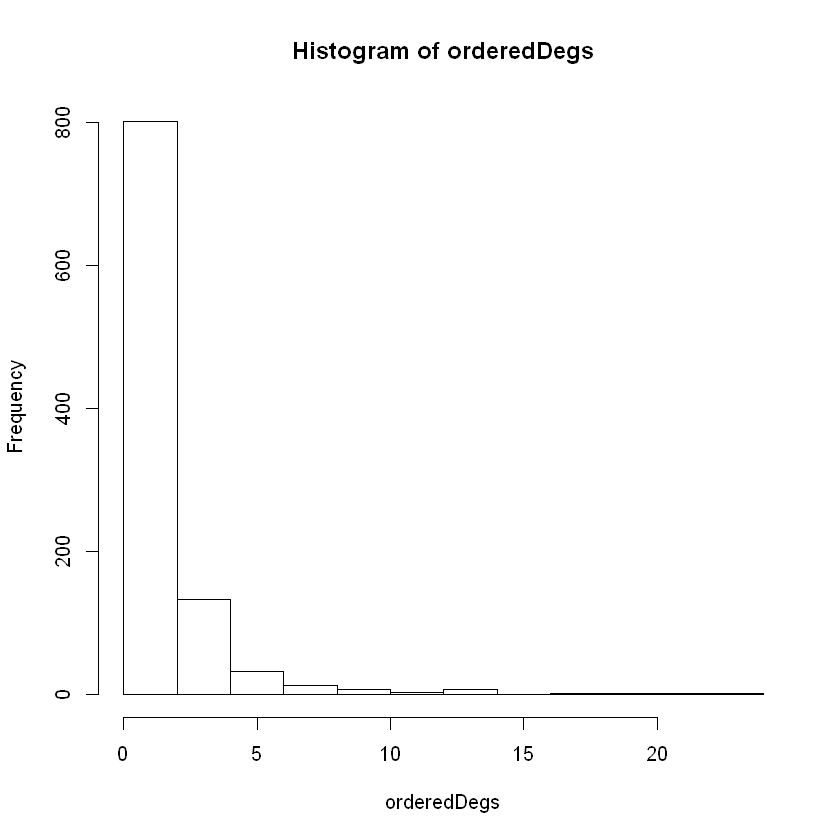

In [144]:
hist(orderedDegs)

# Problem 3

In [66]:
g5 <- sample_pa_age(1000, 1, -1, m = 1, aging.bin = 300,
  out.dist = NULL, out.seq = NULL, out.pref = FALSE, directed = FALSE,
  zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1,
  time.window = NULL)

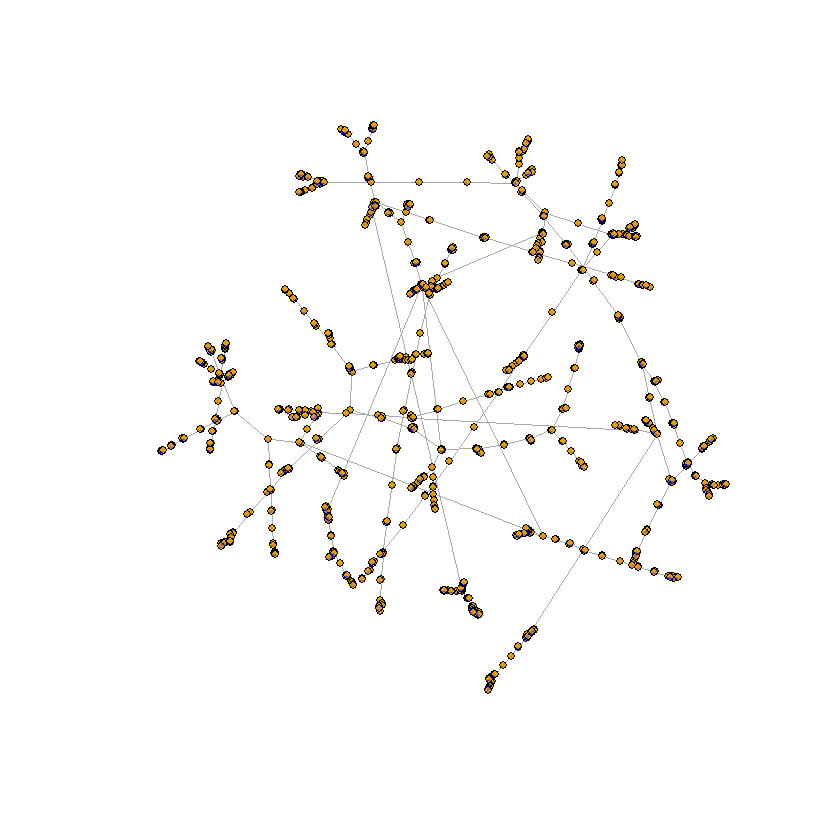

In [52]:
plot(g5,vertex.size=3,vertex.label.cex=0.1)

In [53]:
fg <- fastgreedy.community(g5)
modularity <- max(fg$mod)
modularity

[1] 0.9360938

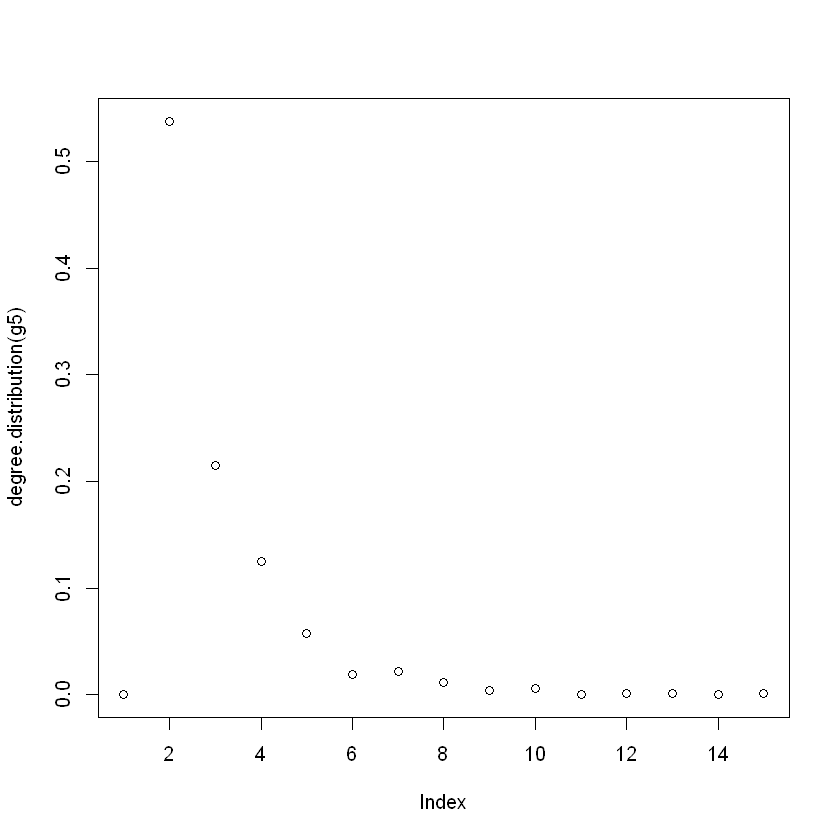

In [54]:
plot(degree.distribution(g5))

In [68]:
d <-degree(g5)
fit1 <- fit_power_law(d)
fprintf("The power law exponent is %f.",fit1$alpha)

The power law exponent is 3.847287.